<a href="https://colab.research.google.com/github/mary-ts/Neural-Computing/blob/tito/cryCS4287_Assign2_19248547_19256434_19232845.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import keras.layers as layers
from keras import Sequential
import keras.models
from keras.layers import *
from keras.models import * 
from keras import optimizers, applications
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [52]:
train_path = "/content/drive/MyDrive/CNN IMAGES/archive (1)/train/train"
test_path = "/content/drive/MyDrive/CNN IMAGES/archive (1)/test"

epochs = 5
batch_size = 64

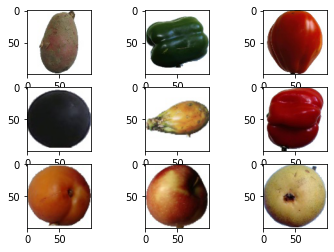

In [5]:
import os
from matplotlib import pyplot
from matplotlib.image import imread

img_dir="/content/drive/MyDrive/CNN IMAGES/archive (1)/test/test"
all_files=os.listdir(img_dir)
data_path = [os.path.join(img_dir + "/" + i) for i in all_files]
k=1
for i in data_path:
  plt.subplot(3,3,k) 
  k=k+1
  plt.imshow(imread(i))
  if k == 10:
    break

plt.show()

In [53]:
train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split = 0.2
)

test_datagen= image.ImageDataGenerator(    
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1)

In [54]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (299,299),
    batch_size = 32,
    class_mode = 'categorical', 
    shuffle=True)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (299,299),
    batch_size = 32,
    shuffle=True,
    class_mode = 'categorical')

Found 16855 images belonging to 33 classes.
Found 5651 images belonging to 1 classes.


In [9]:
base_model = applications.Xception(weights='imagenet', 
                              include_top=False, 
                              input_shape=(299, 299, 3))

for layer in base_model.layers[:-5]:
    layer.trainable = False

model = keras.Sequential()
model.add(base_model)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024, activation="relu"))
model.add(keras.layers.Dense(33, activation="softmax"))

input_shape = (None, 299, 299, 3)
model.build(input_shape)
model.compile(optimizers.RMSprop(learning_rate=0.0001, decay=1e-5),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

83683744/83683744 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 flatten (Flatten)           (None, 204800)            0         
                                                                 
 dense (Dense)               (None, 1024)              209716224 
                                                                 
 dense_1 (Dense)             (None, 33)                33825     
                                                                 
Total params: 230,611,529
Trainable params: 212,916,769
Non-trainable params: 17,694,760
_________________________________________________________________


In [11]:
checkpoint = ModelCheckpoint("xception", monitor='loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq=1)
early = EarlyStopping(monitor='loss', min_delta=0.0001, patience=7, verbose=2, mode='auto')
hist = model.fit(train_generator,  
                                    validation_data=test_generator,                    
                                    epochs=epochs,
                                    callbacks = [checkpoint, early],
                                    verbose=1)

Epoch 1/5

Epoch 1: loss improved from inf to 3.50154, saving model to xception


 1/32 [..............................] - ETA: 31:25 - loss: 3.5015 - accuracy: 0.0625
Epoch 1: loss did not improve from 3.50154
 2/32 [>.............................] - ETA: 7:50 - loss: 3.8810 - accuracy: 0.0938 
Epoch 1: loss did not improve from 3.50154
 3/32 [=>............................] - ETA: 7:25 - loss: 4.9199 - accuracy: 0.0625
Epoch 1: loss did not improve from 3.50154
 4/32 [==>...........................] - ETA: 7:07 - loss: 4.7094 - accuracy: 0.0859
Epoch 1: loss did not improve from 3.50154
 5/32 [===>..........................] - ETA: 7:08 - loss: 4.4825 - accuracy: 0.1063
Epoch 1: loss did not improve from 3.50154
 6/32 [====>.........................] - ETA: 6:47 - loss: 4.5747 - accuracy: 0.1042
Epoch 1: loss did not improve from 3.50154
 7/32 [=====>........................] - ETA: 6:29 - loss: 4.3971 - accuracy: 0.1250
Epoch 1: loss did not improve from 3.50154
 8/32 [======>.......................] - ETA: 6:11 - loss: 4.3443 - accuracy: 0.1211
Epoch 1: loss did

18/32 [===============>..............] - ETA: 4:00 - loss: 3.4368 - accuracy: 0.2014
Epoch 1: loss improved from 3.43675 to 3.38688, saving model to xception


19/32 [================>.............] - ETA: 4:02 - loss: 3.3869 - accuracy: 0.2056
Epoch 1: loss improved from 3.38688 to 3.33885, saving model to xception


20/32 [=================>............] - ETA: 3:58 - loss: 3.3389 - accuracy: 0.2094
Epoch 1: loss improved from 3.33885 to 3.30951, saving model to xception


21/32 [==================>...........] - ETA: 3:53 - loss: 3.3095 - accuracy: 0.2098
Epoch 1: loss improved from 3.30951 to 3.26565, saving model to xception


22/32 [===================>..........] - ETA: 3:42 - loss: 3.2657 - accuracy: 0.2202
Epoch 1: loss improved from 3.26565 to 3.22879, saving model to xception


23/32 [====================>.........] - ETA: 3:28 - loss: 3.2288 - accuracy: 0.2242
Epoch 1: loss improved from 3.22879 to 3.19797, saving model to xception


24/32 [=====================>........] - ETA: 3:12 - loss: 3.1980 - accuracy: 0.2253
Epoch 1: loss improved from 3.19797 to 3.15788, saving model to xception


25/32 [======================>.......] - ETA: 2:53 - loss: 3.1579 - accuracy: 0.2300
Epoch 1: loss improved from 3.15788 to 3.11952, saving model to xception


26/32 [=======================>......] - ETA: 2:35 - loss: 3.1195 - accuracy: 0.2356
Epoch 1: loss improved from 3.11952 to 3.08141, saving model to xception


27/32 [========================>.....] - ETA: 2:12 - loss: 3.0814 - accuracy: 0.2421
Epoch 1: loss improved from 3.08141 to 3.05592, saving model to xception


28/32 [=========================>....] - ETA: 1:47 - loss: 3.0559 - accuracy: 0.2446
Epoch 1: loss improved from 3.05592 to 3.03587, saving model to xception


29/32 [==========================>...] - ETA: 1:22 - loss: 3.0359 - accuracy: 0.2427
Epoch 1: loss improved from 3.03587 to 3.01991, saving model to xception


30/32 [===========================>..] - ETA: 55s - loss: 3.0199 - accuracy: 0.2492 
Epoch 1: loss improved from 3.01991 to 3.00670, saving model to xception


31/32 [============================>.] - ETA: 28s - loss: 3.0067 - accuracy: 0.2503
Epoch 1: loss improved from 3.00670 to 2.99135, saving model to xception


32/32 [==============================] - 956s 29s/step - loss: 2.9913 - accuracy: 0.2522
Epoch 2/5

Epoch 2: loss improved from 2.99135 to 2.01937, saving model to xception


 1/32 [..............................] - ETA: 27:52 - loss: 2.0194 - accuracy: 0.5000
Epoch 2: loss improved from 2.01937 to 1.87893, saving model to xception


 2/32 [>.............................] - ETA: 20:32 - loss: 1.8789 - accuracy: 0.4688
Epoch 2: loss improved from 1.87893 to 1.81608, saving model to xception


 3/32 [=>............................] - ETA: 19:59 - loss: 1.8161 - accuracy: 0.5000
Epoch 2: loss improved from 1.81608 to 1.79449, saving model to xception


 4/32 [==>...........................] - ETA: 19:20 - loss: 1.7945 - accuracy: 0.5000
Epoch 2: loss improved from 1.79449 to 1.77046, saving model to xception


 5/32 [===>..........................] - ETA: 18:41 - loss: 1.7705 - accuracy: 0.5125
Epoch 2: loss did not improve from 1.77046
 6/32 [====>.........................] - ETA: 15:46 - loss: 1.7852 - accuracy: 0.5208
Epoch 2: loss did not improve from 1.77046
 7/32 [=====>........................] - ETA: 13:41 - loss: 1.8051 - accuracy: 0.5089
Epoch 2: loss did not improve from 1.77046
 8/32 [======>.......................] - ETA: 12:07 - loss: 1.7859 - accuracy: 0.5195
Epoch 2: loss improved from 1.77046 to 1.74114, saving model to xception


 9/32 [=======>......................] - ETA: 12:23 - loss: 1.7411 - accuracy: 0.5208
Epoch 2: loss did not improve from 1.74114
10/32 [========>.....................] - ETA: 11:10 - loss: 1.7509 - accuracy: 0.5094
Epoch 2: loss did not improve from 1.74114
11/32 [=========>....................] - ETA: 10:09 - loss: 1.7474 - accuracy: 0.5114
Epoch 2: loss did not improve from 1.74114
12/32 [==========>...................] - ETA: 9:17 - loss: 1.7621 - accuracy: 0.5000 
Epoch 2: loss did not improve from 1.74114
13/32 [===========>..................] - ETA: 8:30 - loss: 1.7523 - accuracy: 0.5024
Epoch 2: loss did not improve from 1.74114
14/32 [============>.................] - ETA: 7:47 - loss: 1.7772 - accuracy: 0.5022
Epoch 2: loss did not improve from 1.74114
15/32 [=============>................] - ETA: 7:09 - loss: 1.7770 - accuracy: 0.4979
Epoch 2: loss did not improve from 1.74114
16/32 [==============>...............] - ETA: 6:33 - loss: 1.7762 - accuracy: 0.5020
Epoch 2: loss d

 1/32 [..............................] - ETA: 26:26 - loss: 1.4434 - accuracy: 0.5000
Epoch 3: loss did not improve from 1.44338
 2/32 [>.............................] - ETA: 7:36 - loss: 1.5476 - accuracy: 0.5469 
Epoch 3: loss did not improve from 1.44338
 3/32 [=>............................] - ETA: 7:24 - loss: 1.6359 - accuracy: 0.5208
Epoch 3: loss did not improve from 1.44338
 4/32 [==>...........................] - ETA: 7:07 - loss: 1.6939 - accuracy: 0.5469
Epoch 3: loss did not improve from 1.44338
 5/32 [===>..........................] - ETA: 7:22 - loss: 1.6470 - accuracy: 0.5312
Epoch 3: loss did not improve from 1.44338
 6/32 [====>.........................] - ETA: 7:01 - loss: 1.6749 - accuracy: 0.5469
Epoch 3: loss did not improve from 1.44338
 7/32 [=====>........................] - ETA: 6:40 - loss: 1.6987 - accuracy: 0.5491
Epoch 3: loss did not improve from 1.44338
 8/32 [======>.......................] - ETA: 6:20 - loss: 1.6485 - accuracy: 0.5547
Epoch 3: loss did

21/32 [==================>...........] - ETA: 3:05 - loss: 1.4321 - accuracy: 0.5833
Epoch 3: loss improved from 1.43210 to 1.41101, saving model to xception


22/32 [===================>..........] - ETA: 3:00 - loss: 1.4110 - accuracy: 0.5923
Epoch 3: loss improved from 1.41101 to 1.40212, saving model to xception


23/32 [====================>.........] - ETA: 2:52 - loss: 1.4021 - accuracy: 0.5965
Epoch 3: loss improved from 1.40212 to 1.38263, saving model to xception


24/32 [=====================>........] - ETA: 2:42 - loss: 1.3826 - accuracy: 0.6042
Epoch 3: loss improved from 1.38263 to 1.36535, saving model to xception


25/32 [======================>.......] - ETA: 2:28 - loss: 1.3654 - accuracy: 0.6087
Epoch 3: loss did not improve from 1.36535
26/32 [=======================>......] - ETA: 2:06 - loss: 1.3654 - accuracy: 0.6058
Epoch 3: loss improved from 1.36535 to 1.35389, saving model to xception


27/32 [========================>.....] - ETA: 1:48 - loss: 1.3539 - accuracy: 0.6076
Epoch 3: loss improved from 1.35389 to 1.34756, saving model to xception


28/32 [=========================>....] - ETA: 1:30 - loss: 1.3476 - accuracy: 0.6060
Epoch 3: loss improved from 1.34756 to 1.33808, saving model to xception


29/32 [==========================>...] - ETA: 1:10 - loss: 1.3381 - accuracy: 0.6067
Epoch 3: loss improved from 1.33808 to 1.33206, saving model to xception


30/32 [===========================>..] - ETA: 48s - loss: 1.3321 - accuracy: 0.6062 
Epoch 3: loss did not improve from 1.33206
31/32 [============================>.] - ETA: 23s - loss: 1.3328 - accuracy: 0.6048
Epoch 3: loss did not improve from 1.33206
32/32 [==============================] - 783s 24s/step - loss: 1.3335 - accuracy: 0.6025
Epoch 4/5

Epoch 4: loss improved from 1.33206 to 1.09303, saving model to xception


 1/32 [..............................] - ETA: 26:26 - loss: 1.0930 - accuracy: 0.6250
Epoch 4: loss improved from 1.09303 to 1.04820, saving model to xception


 2/32 [>.............................] - ETA: 21:02 - loss: 1.0482 - accuracy: 0.6406
Epoch 4: loss did not improve from 1.04820
 3/32 [=>............................] - ETA: 14:36 - loss: 1.1042 - accuracy: 0.6562
Epoch 4: loss did not improve from 1.04820
 4/32 [==>...........................] - ETA: 11:51 - loss: 1.1264 - accuracy: 0.6484
Epoch 4: loss did not improve from 1.04820
 5/32 [===>..........................] - ETA: 10:16 - loss: 1.1063 - accuracy: 0.6562
Epoch 4: loss improved from 1.04820 to 1.04606, saving model to xception


 6/32 [====>.........................] - ETA: 11:27 - loss: 1.0461 - accuracy: 0.6771
Epoch 4: loss improved from 1.04606 to 1.03178, saving model to xception


 7/32 [=====>........................] - ETA: 12:00 - loss: 1.0318 - accuracy: 0.6786
Epoch 4: loss did not improve from 1.03178
 8/32 [======>.......................] - ETA: 10:45 - loss: 1.0413 - accuracy: 0.6836
Epoch 4: loss improved from 1.03178 to 1.02506, saving model to xception


 9/32 [=======>......................] - ETA: 10:58 - loss: 1.0251 - accuracy: 0.6910
Epoch 4: loss did not improve from 1.02506
10/32 [========>.....................] - ETA: 9:58 - loss: 1.0328 - accuracy: 0.6844 
Epoch 4: loss did not improve from 1.02506
11/32 [=========>....................] - ETA: 9:05 - loss: 1.0302 - accuracy: 0.6847
Epoch 4: loss did not improve from 1.02506
12/32 [==========>...................] - ETA: 8:24 - loss: 1.0424 - accuracy: 0.6745
Epoch 4: loss improved from 1.02506 to 1.02349, saving model to xception


13/32 [===========>..................] - ETA: 8:38 - loss: 1.0235 - accuracy: 0.6755
Epoch 4: loss did not improve from 1.02349
14/32 [============>.................] - ETA: 7:55 - loss: 1.0407 - accuracy: 0.6696
Epoch 4: loss did not improve from 1.02349
15/32 [=============>................] - ETA: 7:15 - loss: 1.0251 - accuracy: 0.6792
Epoch 4: loss did not improve from 1.02349
16/32 [==============>...............] - ETA: 6:38 - loss: 1.0263 - accuracy: 0.6719
Epoch 4: loss did not improve from 1.02349
17/32 [==============>...............] - ETA: 6:04 - loss: 1.0402 - accuracy: 0.6710
Epoch 4: loss did not improve from 1.02349
18/32 [===============>..............] - ETA: 5:34 - loss: 1.0389 - accuracy: 0.6701
Epoch 4: loss improved from 1.02349 to 1.00727, saving model to xception


19/32 [================>.............] - ETA: 5:22 - loss: 1.0073 - accuracy: 0.6826
Epoch 4: loss improved from 1.00727 to 0.99369, saving model to xception


20/32 [=================>............] - ETA: 5:07 - loss: 0.9937 - accuracy: 0.6875
Epoch 4: loss did not improve from 0.99369
21/32 [==================>...........] - ETA: 4:36 - loss: 0.9943 - accuracy: 0.6875
Epoch 4: loss improved from 0.99369 to 0.98257, saving model to xception


22/32 [===================>..........] - ETA: 4:18 - loss: 0.9826 - accuracy: 0.6903
Epoch 4: loss improved from 0.98257 to 0.97241, saving model to xception


23/32 [====================>.........] - ETA: 4:00 - loss: 0.9724 - accuracy: 0.6929
Epoch 4: loss improved from 0.97241 to 0.95111, saving model to xception


24/32 [=====================>........] - ETA: 3:39 - loss: 0.9511 - accuracy: 0.7005
Epoch 4: loss did not improve from 0.95111
25/32 [======================>.......] - ETA: 3:08 - loss: 0.9570 - accuracy: 0.6975
Epoch 4: loss did not improve from 0.95111
26/32 [=======================>......] - ETA: 2:38 - loss: 0.9537 - accuracy: 0.6971
Epoch 4: loss did not improve from 0.95111
27/32 [========================>.....] - ETA: 2:10 - loss: 0.9517 - accuracy: 0.6956
Epoch 4: loss improved from 0.95111 to 0.94221, saving model to xception


28/32 [=========================>....] - ETA: 1:46 - loss: 0.9422 - accuracy: 0.6987
Epoch 4: loss did not improve from 0.94221
29/32 [==========================>...] - ETA: 1:18 - loss: 0.9443 - accuracy: 0.7004
Epoch 4: loss did not improve from 0.94221
30/32 [===========================>..] - ETA: 51s - loss: 0.9492 - accuracy: 0.7000 
Epoch 4: loss did not improve from 0.94221
31/32 [============================>.] - ETA: 25s - loss: 0.9514 - accuracy: 0.6996
Epoch 4: loss did not improve from 0.94221
32/32 [==============================] - 830s 25s/step - loss: 0.9496 - accuracy: 0.7012
Epoch 5/5

Epoch 5: loss did not improve from 0.94221
 1/32 [..............................] - ETA: 12:01 - loss: 0.9784 - accuracy: 0.7188
Epoch 5: loss improved from 0.94221 to 0.86895, saving model to xception


 2/32 [>.............................] - ETA: 20:23 - loss: 0.8690 - accuracy: 0.7188
Epoch 5: loss did not improve from 0.86895
 3/32 [=>............................] - ETA: 15:25 - loss: 0.8928 - accuracy: 0.7083
Epoch 5: loss did not improve from 0.86895
 4/32 [==>...........................] - ETA: 12:18 - loss: 0.8753 - accuracy: 0.6797
Epoch 5: loss improved from 0.86895 to 0.82998, saving model to xception


 5/32 [===>..........................] - ETA: 13:48 - loss: 0.8300 - accuracy: 0.7063
Epoch 5: loss did not improve from 0.82998
 6/32 [====>.........................] - ETA: 11:57 - loss: 0.8449 - accuracy: 0.7083
Epoch 5: loss did not improve from 0.82998
 7/32 [=====>........................] - ETA: 10:37 - loss: 0.8586 - accuracy: 0.7054
Epoch 5: loss did not improve from 0.82998
 8/32 [======>.......................] - ETA: 9:36 - loss: 0.9336 - accuracy: 0.6836 
Epoch 5: loss did not improve from 0.82998
 9/32 [=======>......................] - ETA: 8:47 - loss: 0.9066 - accuracy: 0.6840
Epoch 5: loss did not improve from 0.82998
10/32 [========>.....................] - ETA: 8:06 - loss: 0.9103 - accuracy: 0.6844
Epoch 5: loss did not improve from 0.82998
11/32 [=========>....................] - ETA: 7:39 - loss: 0.8862 - accuracy: 0.6903
Epoch 5: loss did not improve from 0.82998
12/32 [==========>...................] - ETA: 7:05 - loss: 0.8635 - accuracy: 0.6979
Epoch 5: loss d

15/32 [=============>................] - ETA: 6:10 - loss: 0.8289 - accuracy: 0.7083
Epoch 5: loss improved from 0.82888 to 0.80943, saving model to xception


16/32 [==============>...............] - ETA: 6:09 - loss: 0.8094 - accuracy: 0.7168
Epoch 5: loss improved from 0.80943 to 0.80262, saving model to xception


17/32 [==============>...............] - ETA: 6:06 - loss: 0.8026 - accuracy: 0.7151
Epoch 5: loss improved from 0.80262 to 0.78703, saving model to xception


18/32 [===============>..............] - ETA: 5:55 - loss: 0.7870 - accuracy: 0.7240
Epoch 5: loss did not improve from 0.78703
19/32 [================>.............] - ETA: 5:23 - loss: 0.7985 - accuracy: 0.7220
Epoch 5: loss did not improve from 0.78703
20/32 [=================>............] - ETA: 4:55 - loss: 0.8052 - accuracy: 0.7219
Epoch 5: loss did not improve from 0.78703
21/32 [==================>...........] - ETA: 4:25 - loss: 0.7949 - accuracy: 0.7277
Epoch 5: loss improved from 0.78703 to 0.78537, saving model to xception


22/32 [===================>..........] - ETA: 4:09 - loss: 0.7854 - accuracy: 0.7301
Epoch 5: loss improved from 0.78537 to 0.78058, saving model to xception


23/32 [====================>.........] - ETA: 3:50 - loss: 0.7806 - accuracy: 0.7351
Epoch 5: loss improved from 0.78058 to 0.77587, saving model to xception


24/32 [=====================>........] - ETA: 3:30 - loss: 0.7759 - accuracy: 0.7357
Epoch 5: loss did not improve from 0.77587
25/32 [======================>.......] - ETA: 3:00 - loss: 0.7766 - accuracy: 0.7362
Epoch 5: loss improved from 0.77587 to 0.76492, saving model to xception


26/32 [=======================>......] - ETA: 2:38 - loss: 0.7649 - accuracy: 0.7404
Epoch 5: loss did not improve from 0.76492
27/32 [========================>.....] - ETA: 2:11 - loss: 0.7654 - accuracy: 0.7419
Epoch 5: loss improved from 0.76492 to 0.75347, saving model to xception


28/32 [=========================>....] - ETA: 1:47 - loss: 0.7535 - accuracy: 0.7467
Epoch 5: loss improved from 0.75347 to 0.74737, saving model to xception


29/32 [==========================>...] - ETA: 1:22 - loss: 0.7474 - accuracy: 0.7489
Epoch 5: loss improved from 0.74737 to 0.74336, saving model to xception


30/32 [===========================>..] - ETA: 56s - loss: 0.7434 - accuracy: 0.7510 
Epoch 5: loss improved from 0.74336 to 0.73650, saving model to xception


31/32 [============================>.] - ETA: 28s - loss: 0.7365 - accuracy: 0.7520
Epoch 5: loss improved from 0.73650 to 0.72371, saving model to xception


32/32 [==============================] - 921s 29s/step - loss: 0.7237 - accuracy: 0.7568


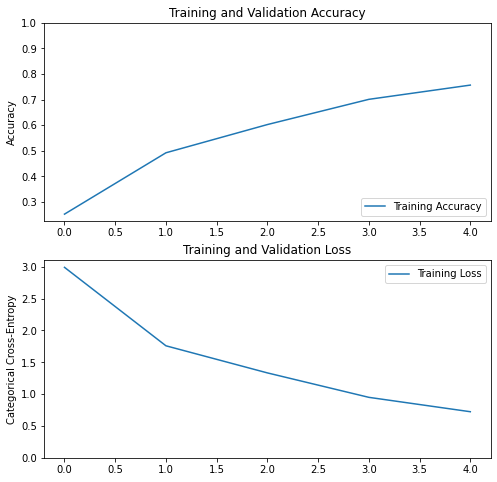

In [14]:
import matplotlib.pyplot as plt

acc = hist.history['accuracy']
#val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
#val_loss = hist.history['val_loss']

# Accuracy Graph

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
#plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

# Loss Graph

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
#plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Categorical Cross-Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

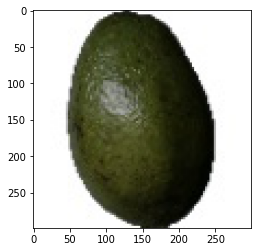

In [19]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
#from tensorflow.explain.core.activations import ExtractActivations
from tensorflow.keras.applications.xception import decode_predictions
%matplotlib inline
import requests
from matplotlib.image import imread

#loading and preprocessing fruits
IMAGE_PATH='/content/drive/MyDrive/CNN IMAGES/archive (1)/test/test/0013.jpg'
imread=tf.keras.preprocessing.image.load_img(IMAGE_PATH,target_size=(299,299))
imread=tf.keras.preprocessing.image.img_to_array(imread)

#view the image
plt.imshow(imread/255.)

In [55]:
from numpy import genfromtxt
import csv
import requests
#fetching labels from Imagenet  
response=requests.get('https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json')
imgnet_map=response.json()

#make model predictions
a = np.array([imread])
imread=tf.keras.applications.xception.preprocess_input(imread)
predictions=model.predict(test_generator)
decode_predictions(predictions,top=5)

177/177 [==============================] - 2526s 14s/step


ValueError: ignored